In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio

In [3]:
flows = pd.read_csv("../data/inflows of foreign population by nationality.csv", low_memory=False)

flows = flows.dropna(subset=['Value'])
flows_cleaned = flows.dropna(subset=['Value'])

# dropping columns that we don't need
flows_cleaned = flows.drop(columns=['Flag Codes', 'Flags'])


In [4]:
inflows_cleaned = flows_cleaned[flows_cleaned['Variable'] == 'Inflows of foreign population by nationality']
inflows_cleaned = inflows_cleaned[inflows_cleaned['Country of birth/nationality'] != "Total"]

# K-Means

In [5]:
df = inflows_cleaned[['Country of birth/nationality', 'Country', 'Year', 'Value']]

/var/folders/pq/qfw7ttdx6js3zt8l7f7hpvtm0000gn/T/ipykernel_9419/3105450054.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Value'] = scaler.fit_transform(df[['Value']])


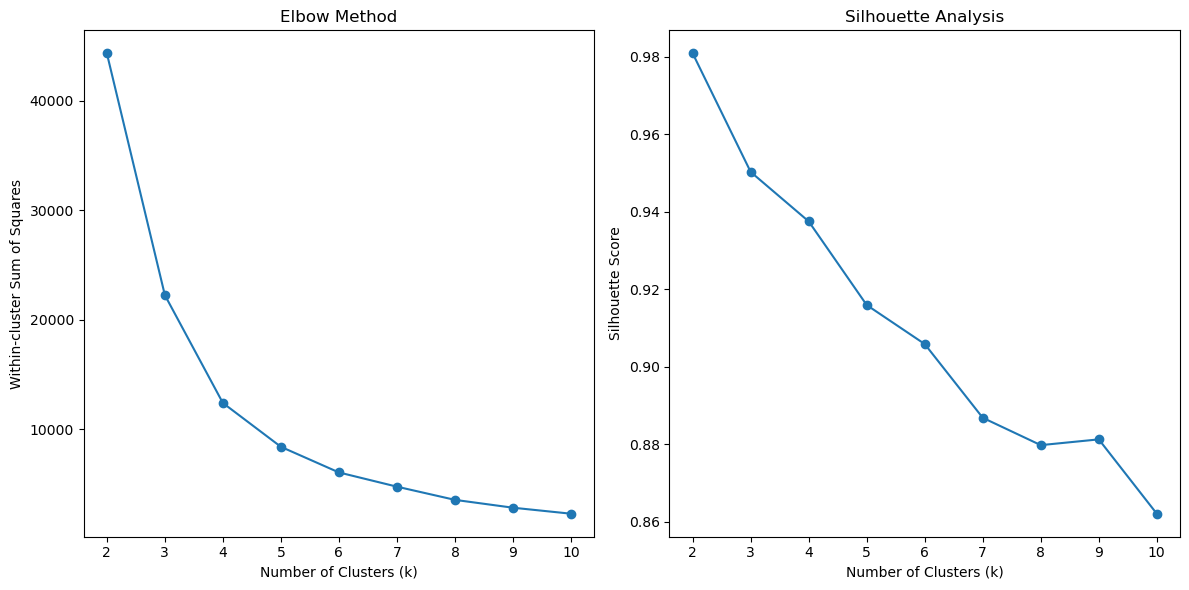

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Standardize the features
scaler = StandardScaler()
df.loc[ :, 'Value'] = scaler.fit_transform(df[['Value']])

# Initialize lists to store inertia and silhouette scores
inertia = []
silhouette_scores = []

# Define range of k values to try
k_range = range(2, 11)

# Iterate over each value of k
for k in k_range:
    # Fit K-means clustering algorithm
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[['Value']])
    
    # Calculate inertia and silhouette score
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df[['Value']], kmeans.labels_))

# Plotting elbow method
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-cluster Sum of Squares')
plt.title('Elbow Method')

# Plotting silhouette analysis
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')

plt.tight_layout()
plt.show()


/var/folders/pq/qfw7ttdx6js3zt8l7f7hpvtm0000gn/T/ipykernel_16978/1934669558.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[: ,'cluster_label'] = kmeans.labels_


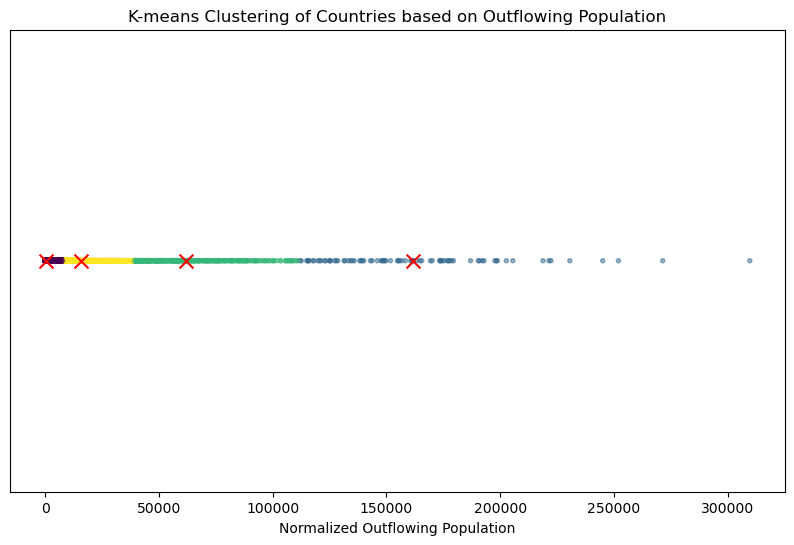

In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# specifying the number of clusters (k)
k = 4

# Fit K-means clustering algorithm
kmeans = KMeans(n_clusters=k)
kmeans.fit(df[['Value']])

# Add cluster labels to the DataFrame
df.loc[: ,'cluster_label'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 6))

# Plot data points
plt.scatter(df['Value'], [0]*len(df), c=df['cluster_label'], cmap='viridis', alpha=0.5, marker='.')

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids, [0]*k, marker='x', s=100, color='red')

plt.title('K-means Clustering of Countries based on Outflowing Population')
plt.xlabel('Normalized Outflowing Population')
plt.yticks([])  # Remove y-axis ticks
plt.show()


/var/folders/pq/qfw7ttdx6js3zt8l7f7hpvtm0000gn/T/ipykernel_16978/2553202943.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(scatter.get_cmap())
/var/folders/pq/qfw7ttdx6js3zt8l7f7hpvtm0000gn/T/ipykernel_16978/2553202943.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c=color, label=f'Cluster {label}')


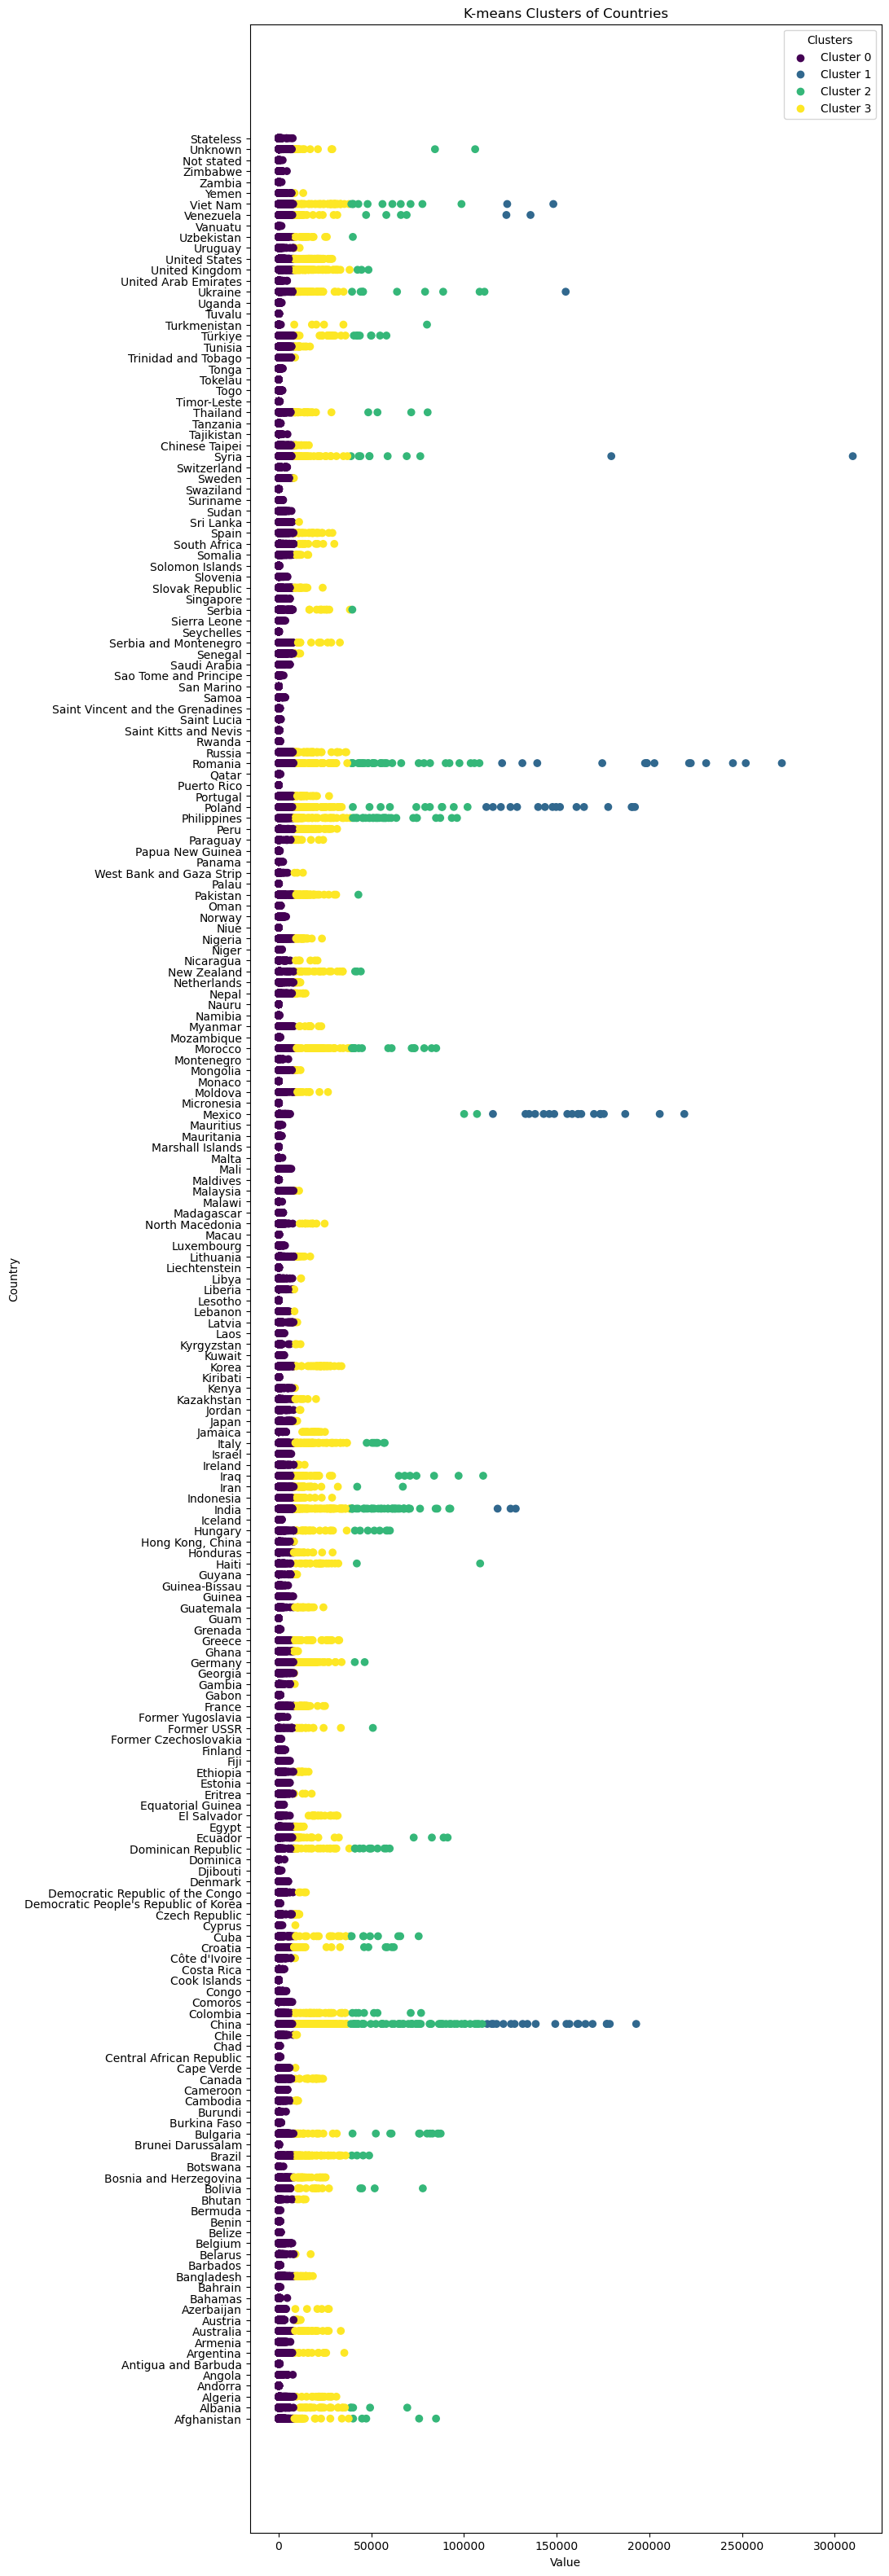

In [7]:

plt.figure(figsize=(10, 40))
scatter = plt.scatter(df['Value'], df['Country of birth/nationality'], c=df['cluster_label'])

unique_labels = np.unique(df['cluster_label'])

# colormap used in the scatter plot
cmap = plt.cm.get_cmap(scatter.get_cmap())


cluster_colors = {}

# Extract colors for each cluster label
for label in unique_labels:
    cluster_colors[label] = cmap(label / (len(unique_labels) - 1))


for label, color in cluster_colors.items():
    plt.scatter([], [], c=color, label=f'Cluster {label}')

plt.legend(loc='upper right', scatterpoints=1, title='Clusters')

plt.xlabel('Value')
plt.ylabel('Country')
plt.title('K-means Clusters of Countries')

plt.show()


/var/folders/pq/qfw7ttdx6js3zt8l7f7hpvtm0000gn/T/ipykernel_16978/3646674789.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(scatter.get_cmap())
/var/folders/pq/qfw7ttdx6js3zt8l7f7hpvtm0000gn/T/ipykernel_16978/3646674789.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c=color, label=f'Cluster {label}')


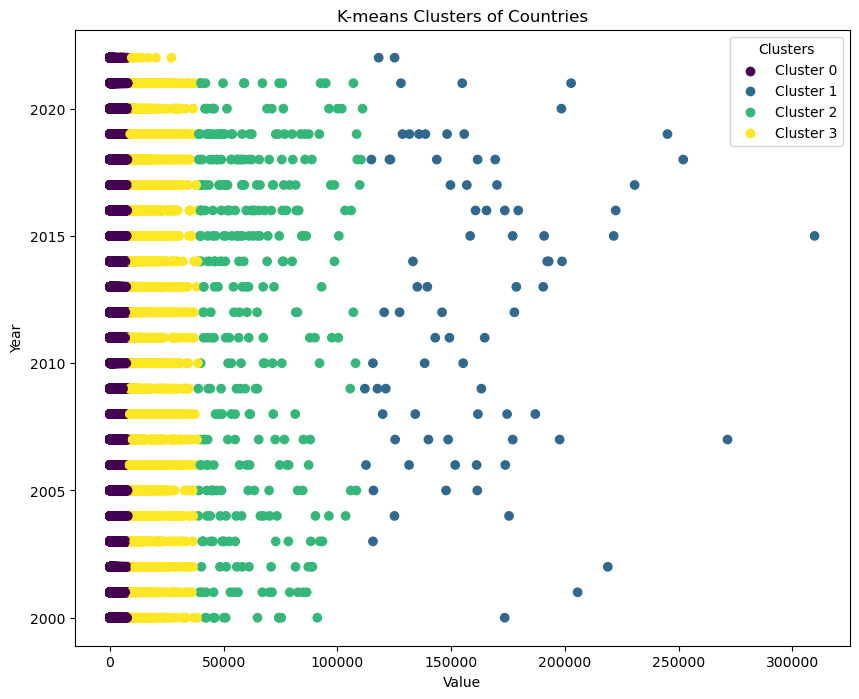

In [8]:

plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['Value'], df['Year'], c=df['cluster_label'])

unique_labels = np.unique(df['cluster_label'])

# colormap used in the scatter plot
cmap = plt.cm.get_cmap(scatter.get_cmap())


cluster_colors = {}

# Extract colors for each cluster label
for label in unique_labels:
    cluster_colors[label] = cmap(label / (len(unique_labels) - 1))


for label, color in cluster_colors.items():
    plt.scatter([], [], c=color, label=f'Cluster {label}')

plt.legend(loc='upper right', scatterpoints=1, title='Clusters')

plt.xlabel('Value')
plt.ylabel('Year')
plt.title('K-means Clusters of Countries')

plt.show()


/var/folders/pq/qfw7ttdx6js3zt8l7f7hpvtm0000gn/T/ipykernel_16978/4025535510.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(scatter.get_cmap())
/var/folders/pq/qfw7ttdx6js3zt8l7f7hpvtm0000gn/T/ipykernel_16978/4025535510.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c=color, label=f'Cluster {label}')


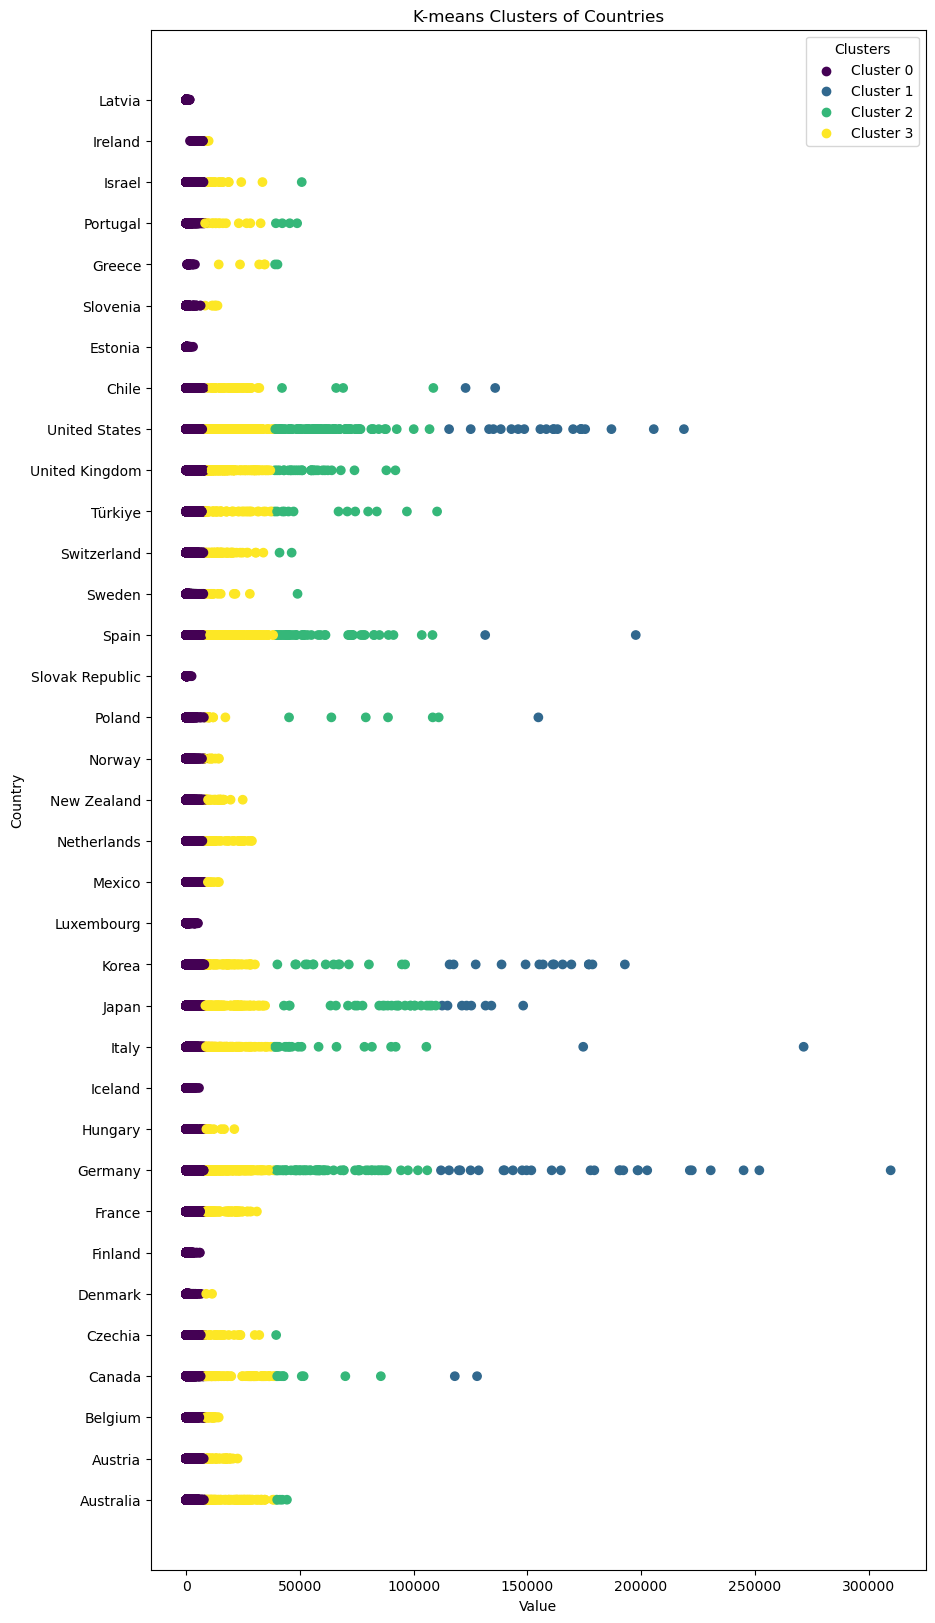

In [9]:
plt.figure(figsize=(10, 20))
scatter = plt.scatter(df['Value'], df['Country'], c=df['cluster_label'])

unique_labels = np.unique(df['cluster_label'])

# colormap used in the scatter plot
cmap = plt.cm.get_cmap(scatter.get_cmap())


cluster_colors = {}

# Extract colors for each cluster label
for label in unique_labels:
    cluster_colors[label] = cmap(label / (len(unique_labels) - 1))


for label, color in cluster_colors.items():
    plt.scatter([], [], c=color, label=f'Cluster {label}')

plt.legend(loc='upper right', scatterpoints=1, title='Clusters')

plt.xlabel('Value')
plt.ylabel('Country')
plt.title('K-means Clusters of Countries')

plt.show()


In [10]:
# similar countries based on immigrant's inflow
for cluster in df['cluster_label'].unique():
    print(f"Cluster {cluster}:")
    print(df[df['cluster_label'] == cluster]['Country'].unique().tolist())

Cluster 0:
['Australia', 'Austria', 'Belgium', 'Canada', 'Czechia', 'Denmark', 'Finland', 'France', 'Germany', 'Hungary', 'Iceland', 'Italy', 'Japan', 'Korea', 'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Slovak Republic', 'Spain', 'Sweden', 'Switzerland', 'Türkiye', 'United Kingdom', 'United States', 'Chile', 'Estonia', 'Slovenia', 'Portugal', 'Israel', 'Greece', 'Ireland', 'Latvia']
Cluster 3:
['Austria', 'Canada', 'France', 'Germany', 'Sweden', 'Türkiye', 'United States', 'Greece', 'Italy', 'Spain', 'United Kingdom', 'Poland', 'Chile', 'Slovenia', 'Japan', 'Portugal', 'Netherlands', 'Korea', 'Australia', 'New Zealand', 'Israel', 'Belgium', 'Switzerland', 'Mexico', 'Norway', 'Hungary', 'Czechia', 'Denmark', 'Ireland']
Cluster 1:
['Germany', 'Türkiye', 'Italy', 'Spain', 'Japan', 'Portugal', 'Canada', 'Korea', 'United Kingdom', 'United States', 'Israel', 'Switzerland', 'Chile', 'Australia', 'Sweden', 'Poland']
Cluster 2:
['Japan', 'Korea', 'Canada', 'Unite

Cluster 1 and 2 are the countries where lots of migrants emigrate to.

# focusing in 2015

In [15]:
## filtering for year 2015

df_2015 = df[df['Year'] == 2015]
df_2015.head()

,Country of birth/nationality,Country,Year,Value,cluster_label
15,Afghanistan,Australia,2015,3323.0,0
74,Afghanistan,Austria,2015,19505.0,3
131,Afghanistan,Belgium,2015,7453.0,0
178,Afghanistan,Canada,2015,2587.0,0
202,Afghanistan,Czechia,2015,55.0,0


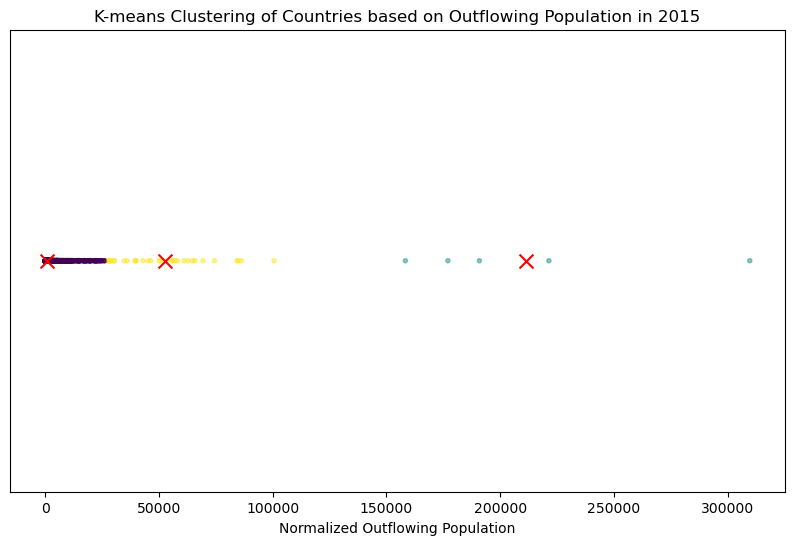

In [18]:

k = 3

# Fit K-means clustering algorithm
kmeans = KMeans(n_clusters=k)
kmeans.fit(df_2015[['Value']])

# Add cluster labels to the DataFrame
df_2015.loc[: ,'cluster_label'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 6))

# Plot data points
plt.scatter(df_2015['Value'], [0]*len(df_2015), c=df_2015['cluster_label'], cmap='viridis', alpha=0.5, marker='.')

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids, [0]*k, marker='x', s=100, color='red')

plt.title('K-means Clustering of Countries based on Outflowing Population in 2015')
plt.xlabel('Normalized Outflowing Population')
plt.yticks([])  # Remove y-axis ticks
plt.show()

/var/folders/pq/qfw7ttdx6js3zt8l7f7hpvtm0000gn/T/ipykernel_16978/3315785890.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(scatter.get_cmap())
/var/folders/pq/qfw7ttdx6js3zt8l7f7hpvtm0000gn/T/ipykernel_16978/3315785890.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c=color, label=f'Cluster {label}')


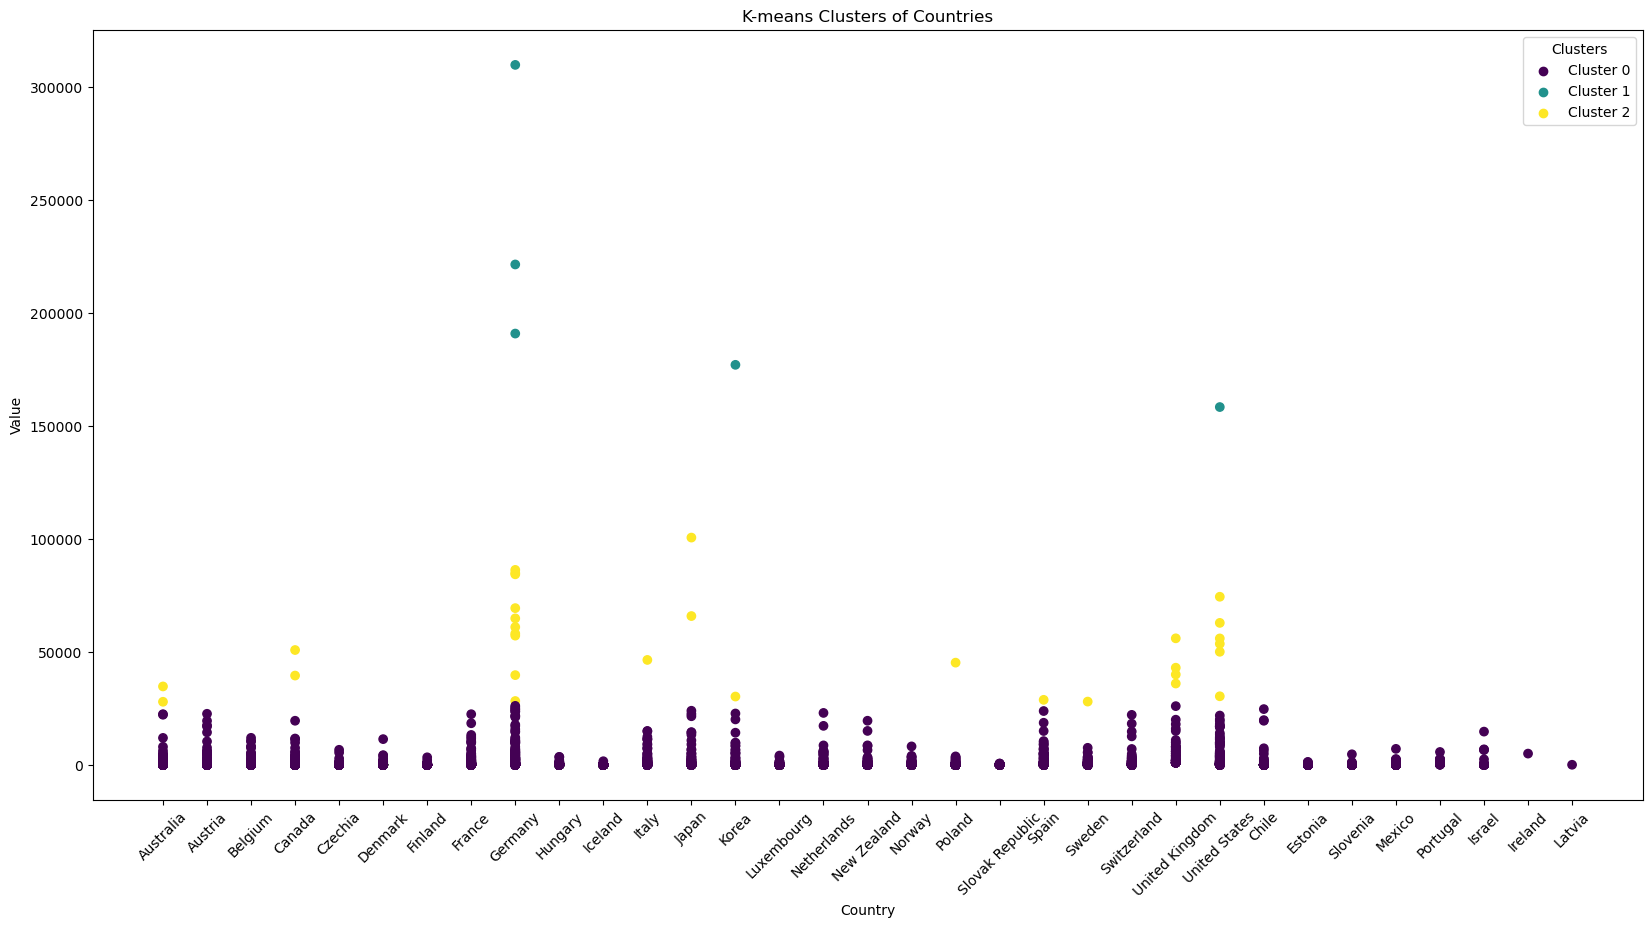

In [25]:
plt.figure(figsize=(20, 10))
scatter = plt.scatter(df_2015['Country'], df_2015['Value'], c=df_2015['cluster_label'])

unique_labels = np.unique(df_2015['cluster_label'])

# colormap used in the scatter plot
cmap = plt.cm.get_cmap(scatter.get_cmap())


cluster_colors = {}

# Extract colors for each cluster label
for label in unique_labels:
    cluster_colors[label] = cmap(label / (len(unique_labels) - 1))


for label, color in cluster_colors.items():
    plt.scatter([], [], c=color, label=f'Cluster {label}')

plt.legend(loc='upper right', scatterpoints=1, title='Clusters')
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Value')
plt.title('K-means Clusters of Countries')

plt.show()

In [21]:
# similar countries based on immigrant's inflow
for cluster in df_2015['cluster_label'].unique():
    print(f"Cluster {cluster}:")
    print(df[df['cluster_label'] == cluster]['Country'].unique().tolist())

Cluster 0:
['Australia', 'Austria', 'Belgium', 'Canada', 'Czechia', 'Denmark', 'Finland', 'France', 'Germany', 'Hungary', 'Iceland', 'Italy', 'Japan', 'Korea', 'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Slovak Republic', 'Spain', 'Sweden', 'Switzerland', 'Türkiye', 'United Kingdom', 'United States', 'Chile', 'Estonia', 'Slovenia', 'Portugal', 'Israel', 'Greece', 'Ireland', 'Latvia']
Cluster 2:
['Germany', 'Türkiye', 'Greece', 'Italy', 'Spain', 'Japan', 'Portugal', 'Canada', 'Korea', 'United Kingdom', 'United States', 'Israel', 'Switzerland', 'Chile', 'Australia', 'Sweden', 'Czechia', 'Poland']
Cluster 1:
['Japan', 'Korea', 'Canada', 'United States', 'Germany', 'Italy', 'Spain', 'Poland', 'Chile']
